In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Dataset shape: (918, 12)

First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtyp

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=df, palette='Set2')


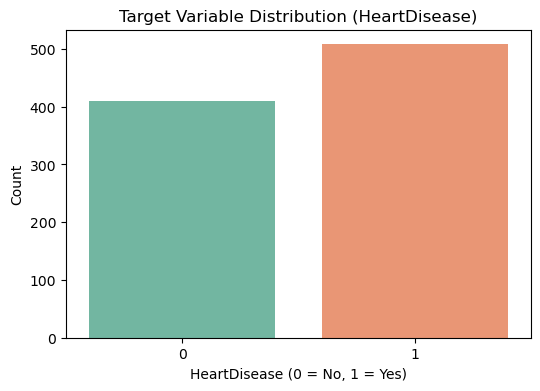

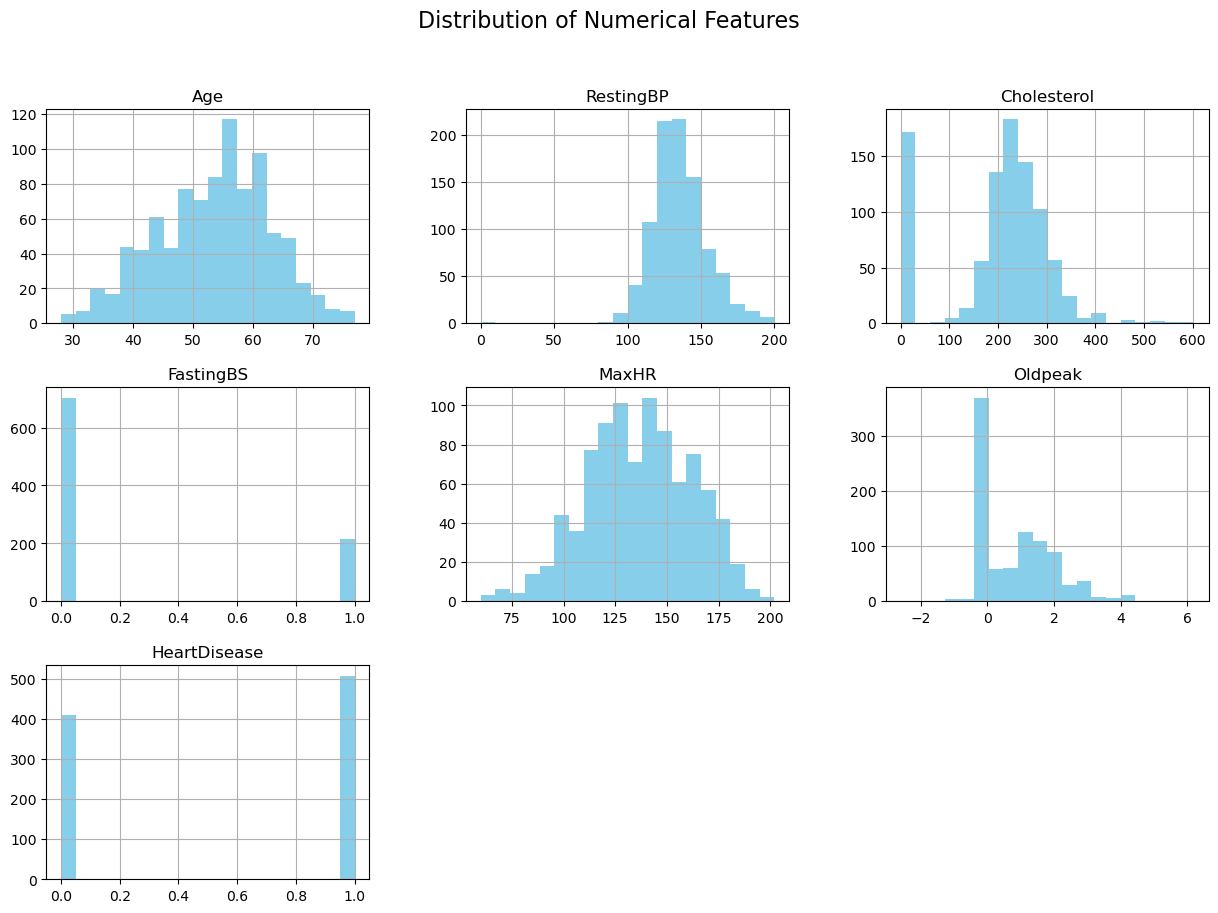

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


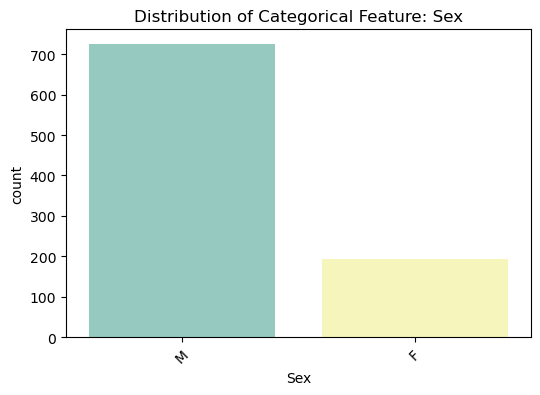

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


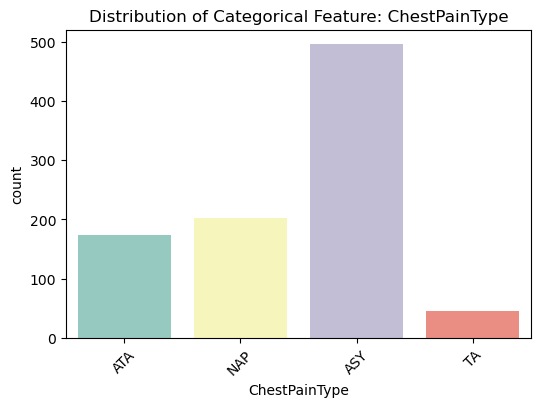

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


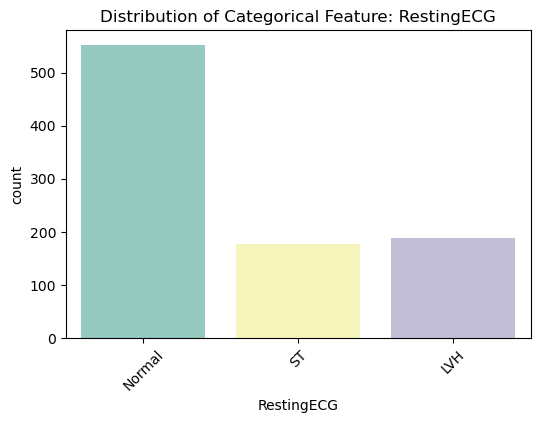

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


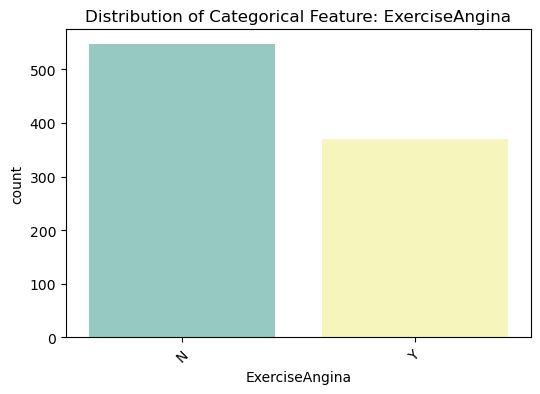

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3')


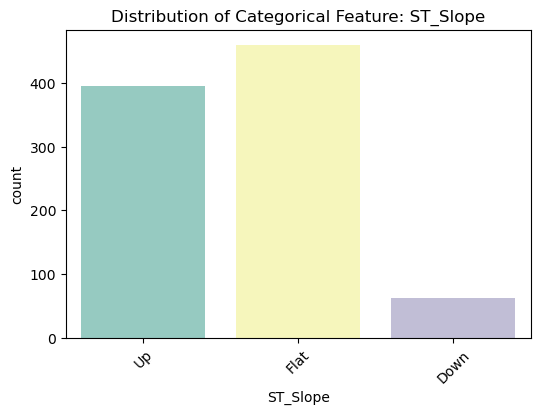

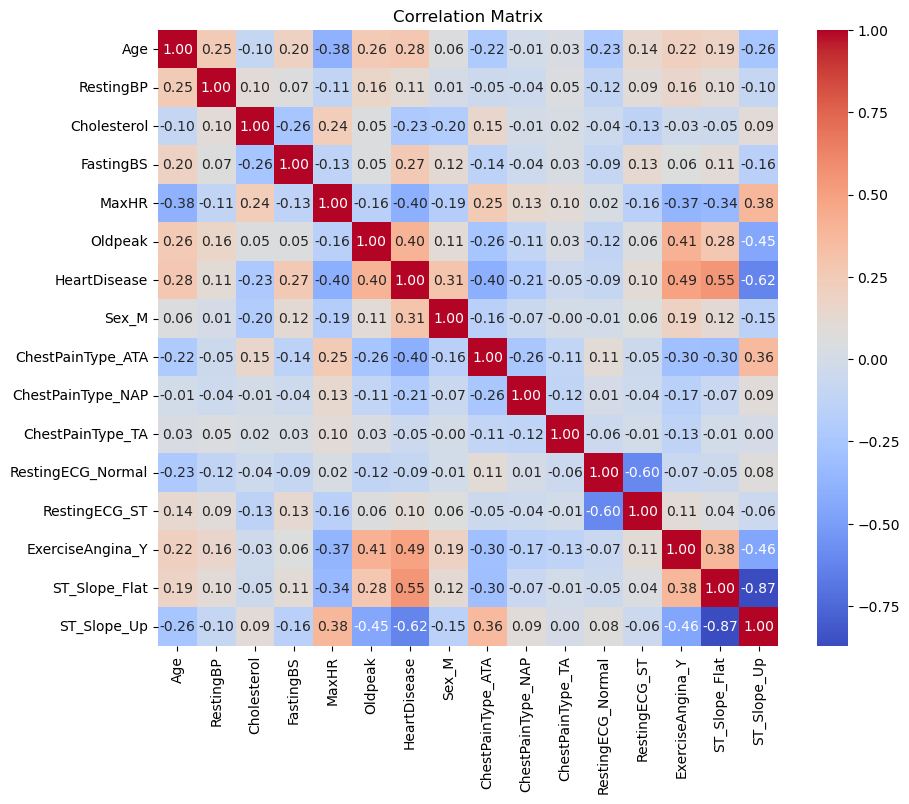

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')


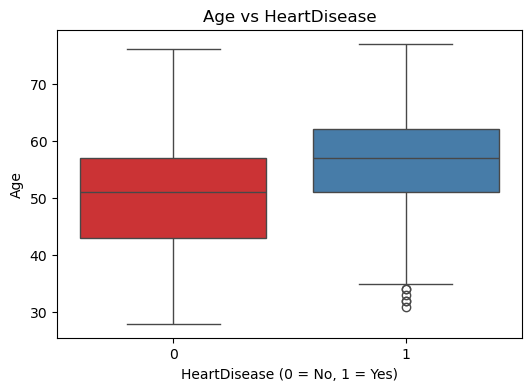

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')


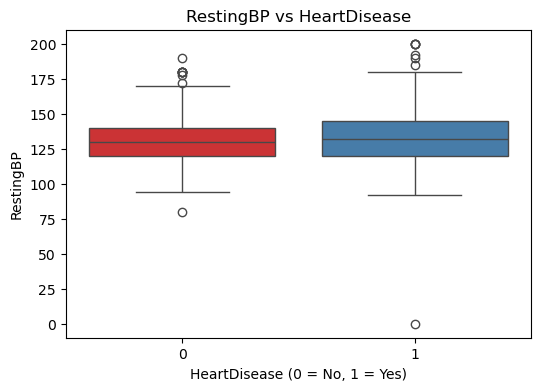

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')


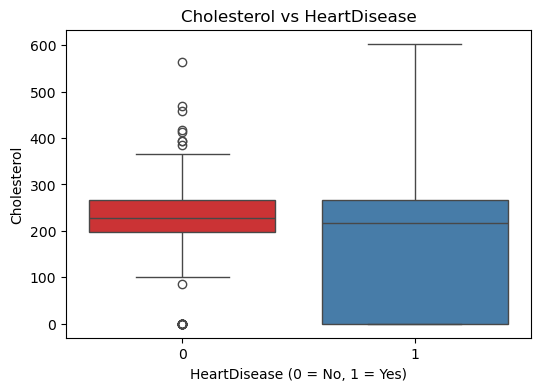

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')


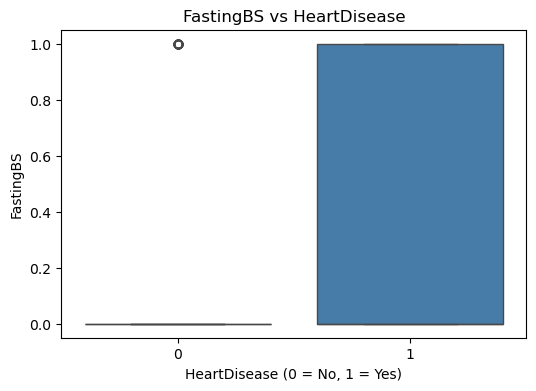

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')


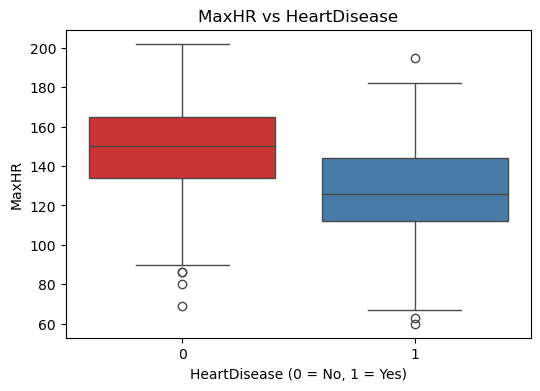

C:\Users\lazar\AppData\Local\Temp\ipykernel_18356\911616880.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')


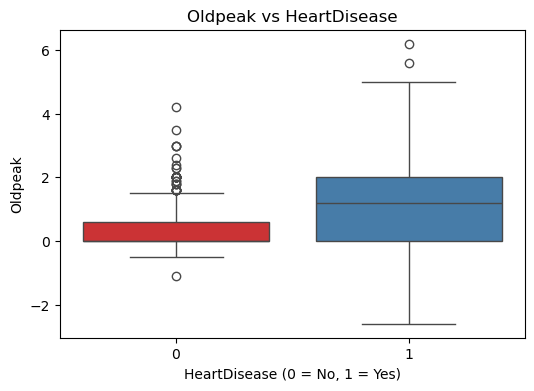

In [5]:
# 1. Basic dataset overview
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn information:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nStatistical summary:")
print(df.describe())

# 2. Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='HeartDisease', data=df, palette='Set2')
plt.title("Target Variable Distribution (HeartDisease)")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 3. Distribution of numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15,10), color='skyblue')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# 4. Distribution of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette='Set3')
    plt.title(f"Distribution of Categorical Feature: {col}")
    plt.xticks(rotation=45)
    plt.show()

# 5. Correlation matrix
plt.figure(figsize=(10,8))
df_enc = pd.get_dummies(df, drop_first=True)
corr = df_enc.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 6. Relationship between numerical features and target
for col in numeric_cols:
    if col != 'HeartDisease':
        plt.figure(figsize=(6,4))
        sns.boxplot(x='HeartDisease', y=col, data=df, palette='Set1')
        plt.title(f"{col} vs HeartDisease")
        plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
        plt.ylabel(col)
        plt.show()

### Outliers, Encoding, Sacling

Numeric columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categorical columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Outlier report (IQR=1.5):
       feature      Q1     Q3    IQR  lower_fence  upper_fence  \
3    FastingBS    0.00    0.0   0.00        0.000        0.000   
2  Cholesterol  173.25  267.0  93.75       32.625      407.625   
1    RestingBP  120.00  140.0  20.00       90.000      170.000   
5      Oldpeak    0.00    1.5   1.50       -2.250        3.750   
4        MaxHR  120.00  156.0  36.00       66.000      210.000   
0          Age   47.00   60.0  13.00       27.500       79.500   

   outliers_count  outliers_pct  
3             214     23.311547  
2             183     19.934641  
1              28      3.050109  
5              16      1.742919  
4               2      0.217865  
0               0      0.000000  


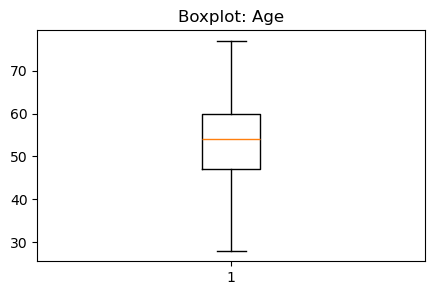

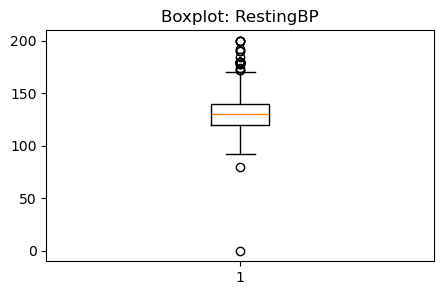

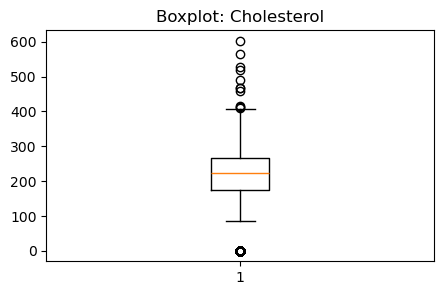

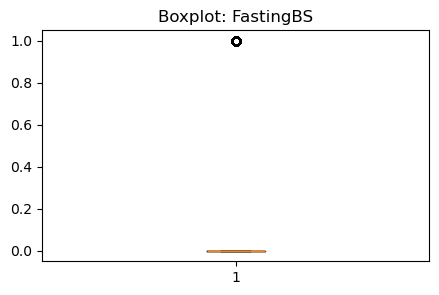

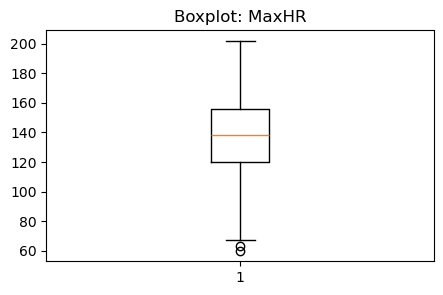

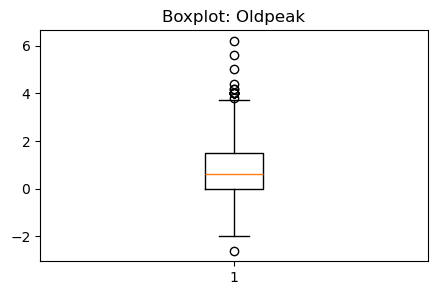


Classification Report (Baseline LR):
              precision    recall  f1-score   support

           0      0.873     0.841     0.857        82
           1      0.876     0.902     0.889       102

    accuracy                          0.875       184
   macro avg      0.875     0.872     0.873       184
weighted avg      0.875     0.875     0.875       184


Confusion Matrix:
[[69 13]
 [10 92]]

ROC AUC: 0.9181013868962219


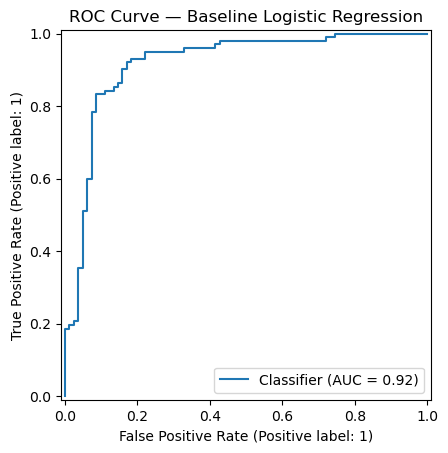

In [7]:
# -------- 1) Identify column types --------
target_col = "HeartDisease"
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target_col, errors="ignore").tolist()
categorical_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# -------- 2) Outlier inspection (IQR-based) --------
def iqr_outlier_summary(data, cols, k=1.5):
    rows = []
    for c in cols:
        x = data[c].dropna()
        q1, q3 = np.percentile(x, [25, 75])
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        n_out = ((data[c] < lower) | (data[c] > upper)).sum()
        rows.append({
            "feature": c, "Q1": q1, "Q3": q3, "IQR": iqr,
            "lower_fence": lower, "upper_fence": upper,
            "outliers_count": int(n_out),
            "outliers_pct": 100 * n_out / len(data)
        })
    return pd.DataFrame(rows).sort_values("outliers_pct", ascending=False)

outlier_report = iqr_outlier_summary(df, numeric_cols, k=1.5)
print("\nOutlier report (IQR=1.5):")
print(outlier_report.head(10))

# (Optional) Quick boxplots to eyeball extremes
for c in numeric_cols:
    plt.figure(figsize=(5,3))
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Boxplot: {c}")
    plt.show()

# -------- 3) Handle outliers (Winsorize via clipping) --------
# Why clipping? It’s simple, keeps all rows, and is robust for linear/SVM models.
# Trees are less sensitive, but clipping still helps stabilize scaling & LR.

def winsorize_iqr(data, cols, k=1.5):
    data = data.copy()
    for c in cols:
        x = data[c]
        q1, q3 = np.percentile(x.dropna(), [25, 75])
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        data[c] = x.clip(lower, upper)
    return data

df_w = winsorize_iqr(df, numeric_cols, k=1.5)

# -------- 4) (Optional) Fix impossible values if present --------
# Example: in some heart datasets, Cholesterol or RestingBP may have zeros that mean "missing".
# If you see suspicious zeros in the EDA, uncomment to treat zeros as missing for chosen columns.
# for col in ["Cholesterol", "RestingBP"]:
#     if col in df_w.columns:
#         df_w[col] = df_w[col].replace(0, np.nan)

# -------- 5) Train/test split --------
X = df_w.drop(columns=[target_col])
y = df_w[target_col].astype(int)  # ensure numeric target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------- 6) Preprocessing pipeline --------
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())  # robust to outliers
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", drop="first"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder="drop"
)

# -------- 7) Baseline model (Logistic Regression) --------
clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500, n_jobs=None, class_weight="balanced"))
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\nClassification Report (Baseline LR):")
print(classification_report(y_test, y_pred, digits=3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_prob))

RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title("ROC Curve — Baseline Logistic Regression")
plt.show()

Training & evaluating: LogReg ...
Training & evaluating: RandomForest ...
Training & evaluating: GradientBoosting ...
Training & evaluating: SVC_RBF ...
Training & evaluating: KNN ...
Training & evaluating: XGBoost ...

===== Model COmparison =====
           Model CV ROC-AUC (mean±std)  Test ROC-AUC  Test Accuracy  Test Precision  Test Recall  Test F1
             KNN         0.912 ± 0.029      0.934840       0.896739        0.895238     0.921569 0.908213
         SVC_RBF         0.921 ± 0.033      0.934242       0.891304        0.879630     0.931373 0.904762
    RandomForest         0.925 ± 0.027      0.924259       0.875000        0.869159     0.911765 0.889952
          LogReg         0.920 ± 0.041      0.918101       0.875000        0.876190     0.901961 0.888889
GradientBoosting         0.922 ± 0.025      0.916786       0.858696        0.880000     0.862745 0.871287
         XGBoost         0.919 ± 0.029      0.915949       0.853261        0.886598     0.843137 0.864322


<Figure size 800x600 with 0 Axes>

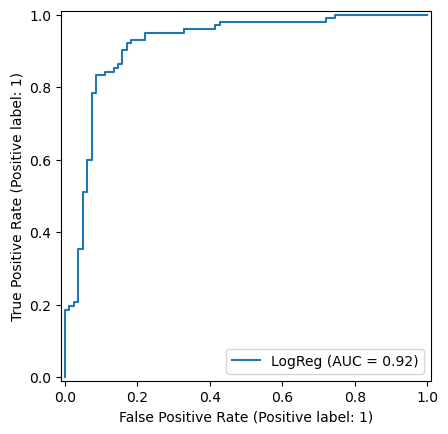

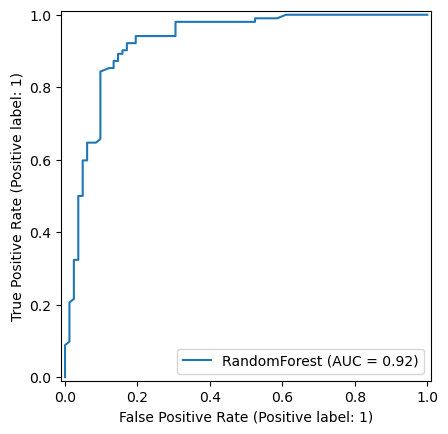

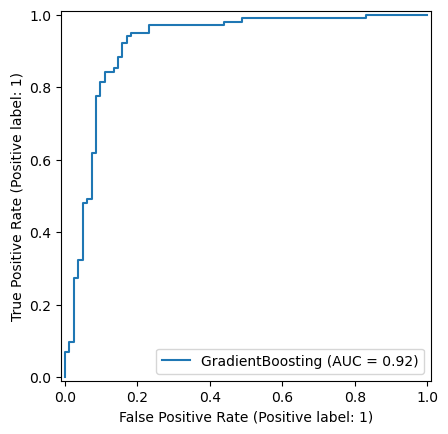

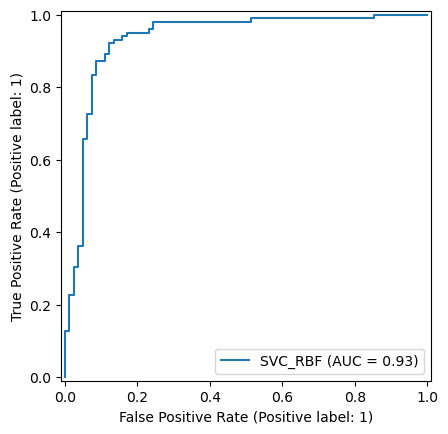

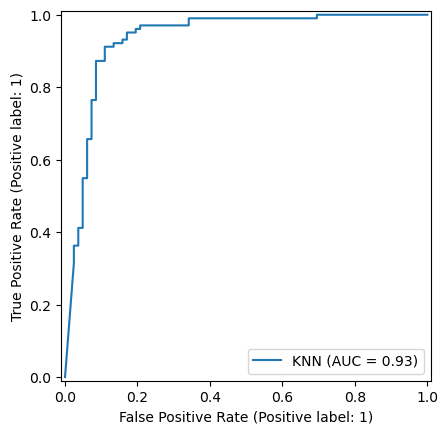

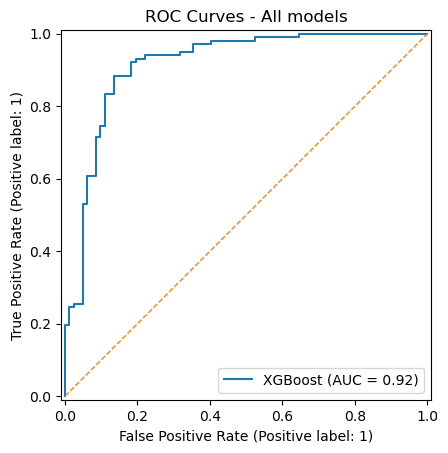

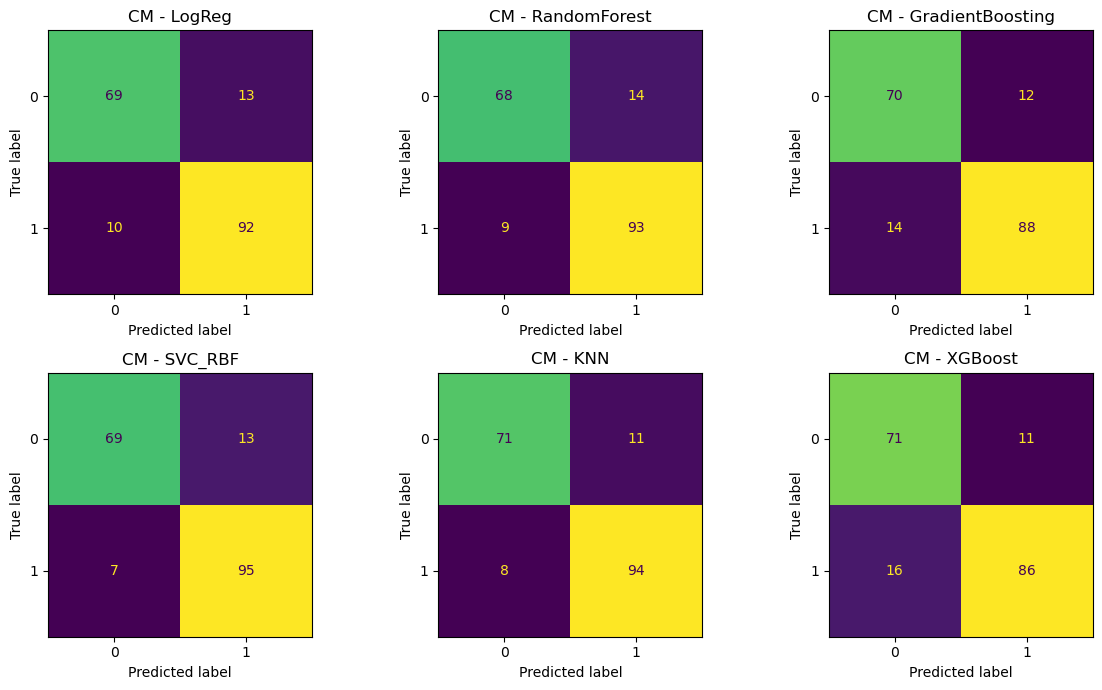


Top 3 by Test ROC-AUC:
       Model CV ROC-AUC (mean±std)  Test ROC-AUC  Test Accuracy  Test Precision  Test Recall  Test F1
         KNN         0.912 ± 0.029      0.934840       0.896739        0.895238     0.921569 0.908213
     SVC_RBF         0.921 ± 0.033      0.934242       0.891304        0.879630     0.931373 0.904762
RandomForest         0.925 ± 0.027      0.924259       0.875000        0.869159     0.911765 0.889952


In [8]:
# (Optional) XGBoost
xgb_available = False
try:
    from xgboost import XGBClassifier
    xgb_available = True
except Exception:
    pass

# 8.1 Define candidate models (all will share the same preprocessor)

models = {
    "LogReg": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=None, n_jobs=-1, class_weight="balanced", random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "SVC_RBF": SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=15, weights="distance")
}
if xgb_available:
    models["XGBoost"] = XGBClassifier(
        n_estimators=500, max_depth=4, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9,
        reg_lambda=1.0, reg_alpha=0.0, random_state=42, n_jobs=-1, eval_metric="logloss",
        tree_method="hist"
    )

# 8.2 Evaluation helper
def evaluate_model(name, base_estimator, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", base_estimator)
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_auc = cross_val_score(pipe, X_train, y_train, scoring="roc_auc", cv=cv, n_jobs=-1)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    # Make sure we get probabilities for ROC-AUC/curves
    if hasattr(pipe.named_steps["model"], "predict_proba"):
        y_prob = pipe.predict_proba(X_test)[:, 1]
    else:
        # Fallback for models without predict_proba
        if hasattr(pipe.named_steps["model"], "decision_function"):
            dec = pipe.decision_function(X_test)
            # Min-max scale to [0, 1]
            y_prob = (dec - dec.min()) / (dec.max() - dec.min() + 1e-9)
        else:
            # Last resort: use hard predictions as proxy
            y_prob = y_pred.astype(float)

    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary", zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    return {
        "name": name,
        "cv_auc_mean": cv_auc.mean(),
        "cv_auc_std": cv_auc.std(),
        "test_accuracy": acc,
        "test_precision": prec,
        "test_recall": rec,
        "test_f1": f1,
        "test_roc_auc": auc,
        "pipe": pipe,
        "y_pred": y_pred,
        "y_prob": y_prob
    }

# 8.3 Train and collect metrics
results = []
for name, est in models.items():
    print(f"Training & evaluating: {name} ...")
    res = evaluate_model(name, est, X_train, y_train, X_test, y_test)
    results.append(res)

# 8.4 Results table (sorted by Test ROC-AUC)
summary_df = pd.DataFrame([{
    "Model": r["name"],
    "CV ROC-AUC (mean±std)": f'{r["cv_auc_mean"]:.3f} ± {r["cv_auc_std"]:.3f}',
    "Test ROC-AUC": r["test_roc_auc"],
    "Test Accuracy": r["test_accuracy"],
    "Test Precision": r["test_precision"],
    "Test Recall": r["test_recall"],
    "Test F1": r["test_f1"]
} for r in results]).sort_values("Test ROC-AUC", ascending=False)

print("\n===== Model COmparison =====")
print(summary_df.to_string(index=False))

# 8.5 ROC curves for all models
plt.figure(figsize=(8, 6))
for r in results:
    RocCurveDisplay.from_predictions(y_test, r["y_prob"], name=r["name"])

plt.title("ROC Curves - All models")
plt.plot([0,1],[0,1],"--", lw=1)
plt.show()

# 8.6 Confusion matrices (grid)
n = len(results)
cols = 3
rows = int(np.ceil(n / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3.5*rows))
axes = axes.flatten()

for ax, r in zip(axes, results):
    ConfusionMatrixDisplay.from_predictions(y_test, r["y_pred"], ax=ax, colorbar=False)
    ax.set_title(f"CM - {r["name"]}")
for j in range(len(results), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 8.7 Print TOP 3 by Test ROC-AUC
print("\nTop 3 by Test ROC-AUC:")
print(summary_df.head(3).to_string(index=False))